In [1]:
!pwd

/Users/shihosato/src/github.com/twinkle13531/master_degree/202011/scripts/trials/SA


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys, os
sys.path.append(os.path.join('..', '..', 'functions'))

In [4]:
#!pip install dwave-neal

In [5]:
import Neal_exact_test_functions as net
import pandas as pd
import numpy as np
import timeit

In [6]:
df = pd.read_csv('../../../input/ost46.csv', sep=',')
print('46 bit datasets t_list:', net.calc_marginals(df))

46 bit datasets t_list: [29 16 12]


In [7]:
t1 = np.dot(df['Y'], df['LI'])
print('46 bit datasets t1 is {}'.format(t1))

46 bit datasets t1 is 19


In [8]:
2**46

70368744177664

### 10000 num_reads

In [9]:
num_reads = 10000
res = net.make_res_data(df, num_reads)

In [10]:
valid_y_list, valid_y_num, occurrence_list = net.find_valid_y(res)

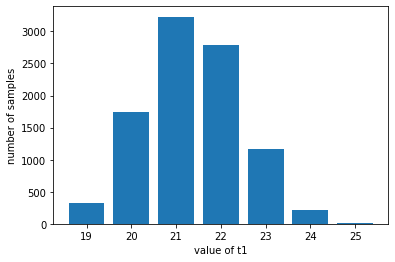

In [11]:
hist_dic = net.y_num_hist(df, valid_y_list, path='../../../output/SA/46bit/nealSA_46bit_10000numreads')

In [12]:
hist_dic

{22: 2781, 21: 3229, 24: 219, 20: 1740, 23: 1167, 19: 329, 25: 20}

In [13]:
valid_y_num

9485

In [14]:
valid_y_list

[[1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0],
 [1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0],
 [1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0],
 [0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0],
 [1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
 

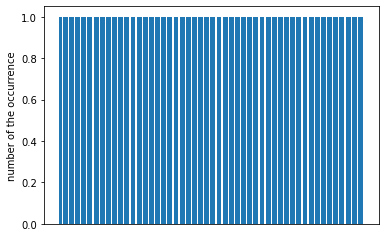

In [15]:
plot_path = '../../../output/SA/46bit/nealSA_46bit_10000numreads_occurance_hist'
net.occurence_hist(occurrence_list, plot_path)

In [16]:
loop = 10
result = timeit.timeit('net.find_valid_y(res)', globals=globals(), number=loop)
reads10000_time = result / loop
print(reads10000_time, '秒')

12.115573013799999 秒


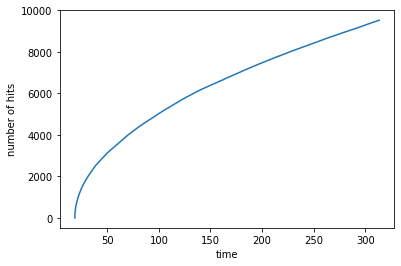

In [17]:
path='../../../output/SA/46bit/nealSA_46bit_10000numreads_num_time_transition'
valid_y_list, valid_y_num_list, time_list = net.time_num_y(df, num_reads, path)

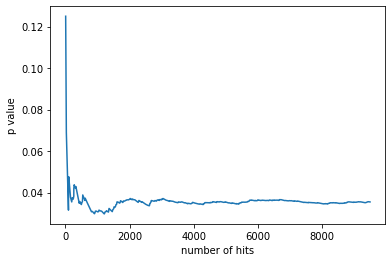

In [18]:
output_path='../../../output/SA/46bit/nealSA_46bit_10000numreads_p_value_transition'
valid_y_num, valid_y_list, p_dic = net.p_value_transition(df, num_reads, output_path)